<a href="https://colab.research.google.com/github/Abrar171041075/Machine-Learning-project/blob/main/Confusion_Matrix%20(Basic%20Seaborn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd #data frame
import seaborn as sns # analysis / visualization
from matplotlib import pyplot as plt  # ploting
import numpy as np       # linear algebra calculation
from sklearn.model_selection import train_test_split as tts  # data spliting
from sklearn.tree import DecisionTreeClassifier # decision tree algoritm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

import warnings as w
w.filterwarnings('ignore')


In [4]:
from google.colab import files
files.upload()

Saving heart failure.csv to heart failure.csv


{'heart failure.csv': b'age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT\r\n75,0,582,0,20,1,265000,1.9,130,1,0,4,1\r\n55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1\r\n65,0,146,0,20,0,162000,1.3,129,1,1,7,1\r\n50,1,111,0,20,0,210000,1.9,137,1,0,7,1\r\n65,1,160,1,20,0,327000,2.7,116,0,0,8,1\r\n90,1,47,0,40,1,204000,2.1,132,1,1,8,1\r\n75,1,246,0,15,0,127000,1.2,137,1,0,10,1\r\n60,1,315,1,60,0,454000,1.1,131,1,1,10,1\r\n65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1\r\n80,1,123,0,35,1,388000,9.4,133,1,1,10,1\r\n75,1,81,0,38,1,368000,4,131,1,1,10,1\r\n62,0,231,0,25,1,253000,0.9,140,1,1,10,1\r\n45,1,981,0,30,0,136000,1.1,137,1,0,11,1\r\n50,1,168,0,38,1,276000,1.1,137,1,0,11,1\r\n49,1,80,0,30,1,427000,1,138,0,0,12,0\r\n82,1,379,0,50,0,47000,1.3,136,1,0,13,1\r\n87,1,149,0,38,0,262000,0.9,140,1,0,14,1\r\n45,0,582,0,14,0,166000,0.8,127,1,0,14,1\r\n70,1,125,0,25,1,237000,1,140,0,0,15,1\r\n48,1,582,1,5

In [5]:
df = pd.read_csv('heart failure.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
df.shape

(299, 13)

In [7]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [23]:
df.time.value_counts()

250    7
187    7
10     6
186    6
107    6
      ..
97     1
96     1
86     1
77     1
285    1
Name: time, Length: 148, dtype: int64

In [24]:
df.serum_creatinine.value_counts()

1.00    50
1.10    32
0.90    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
2.10     5
1.50     5
0.60     4
1.80     4
2.30     3
2.70     3
2.50     3
3.50     2
2.40     2
3.00     2
0.50     1
5.00     1
0.75     1
6.10     1
3.40     1
3.70     1
9.00     1
4.00     1
3.20     1
5.80     1
2.90     1
2.00     1
2.20     1
6.80     1
9.40     1
4.40     1
3.80     1
Name: serum_creatinine, dtype: int64

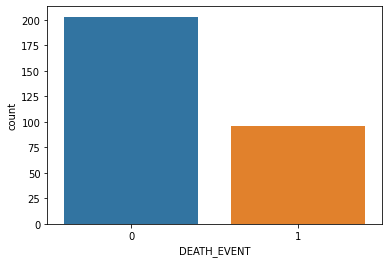

In [9]:
sns.countplot(df.DEATH_EVENT)

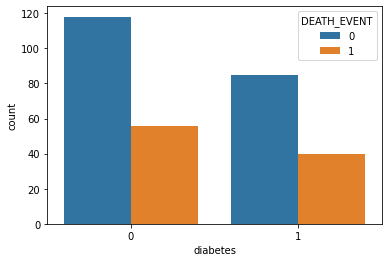

In [12]:
sns.countplot(x='diabetes', hue = 'DEATH_EVENT', data = df )
plt.show()

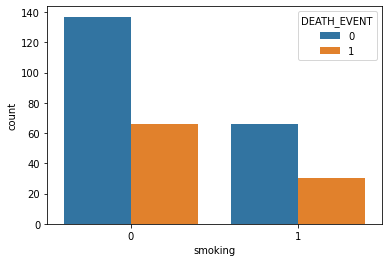

In [13]:
sns.countplot(x='smoking', hue = 'DEATH_EVENT', data = df )
plt.show()

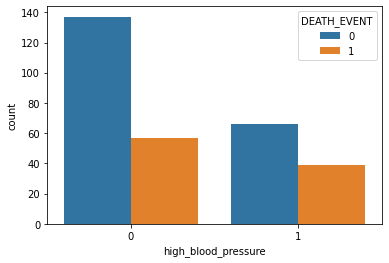

In [15]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)
plt.show()

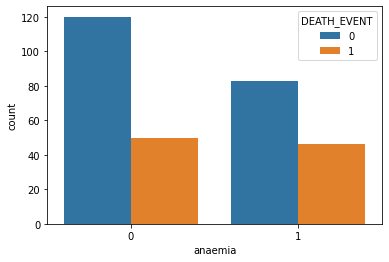

In [18]:
sns.countplot(x = 'anaemia', hue = 'DEATH_EVENT', data= df)
plt.show()

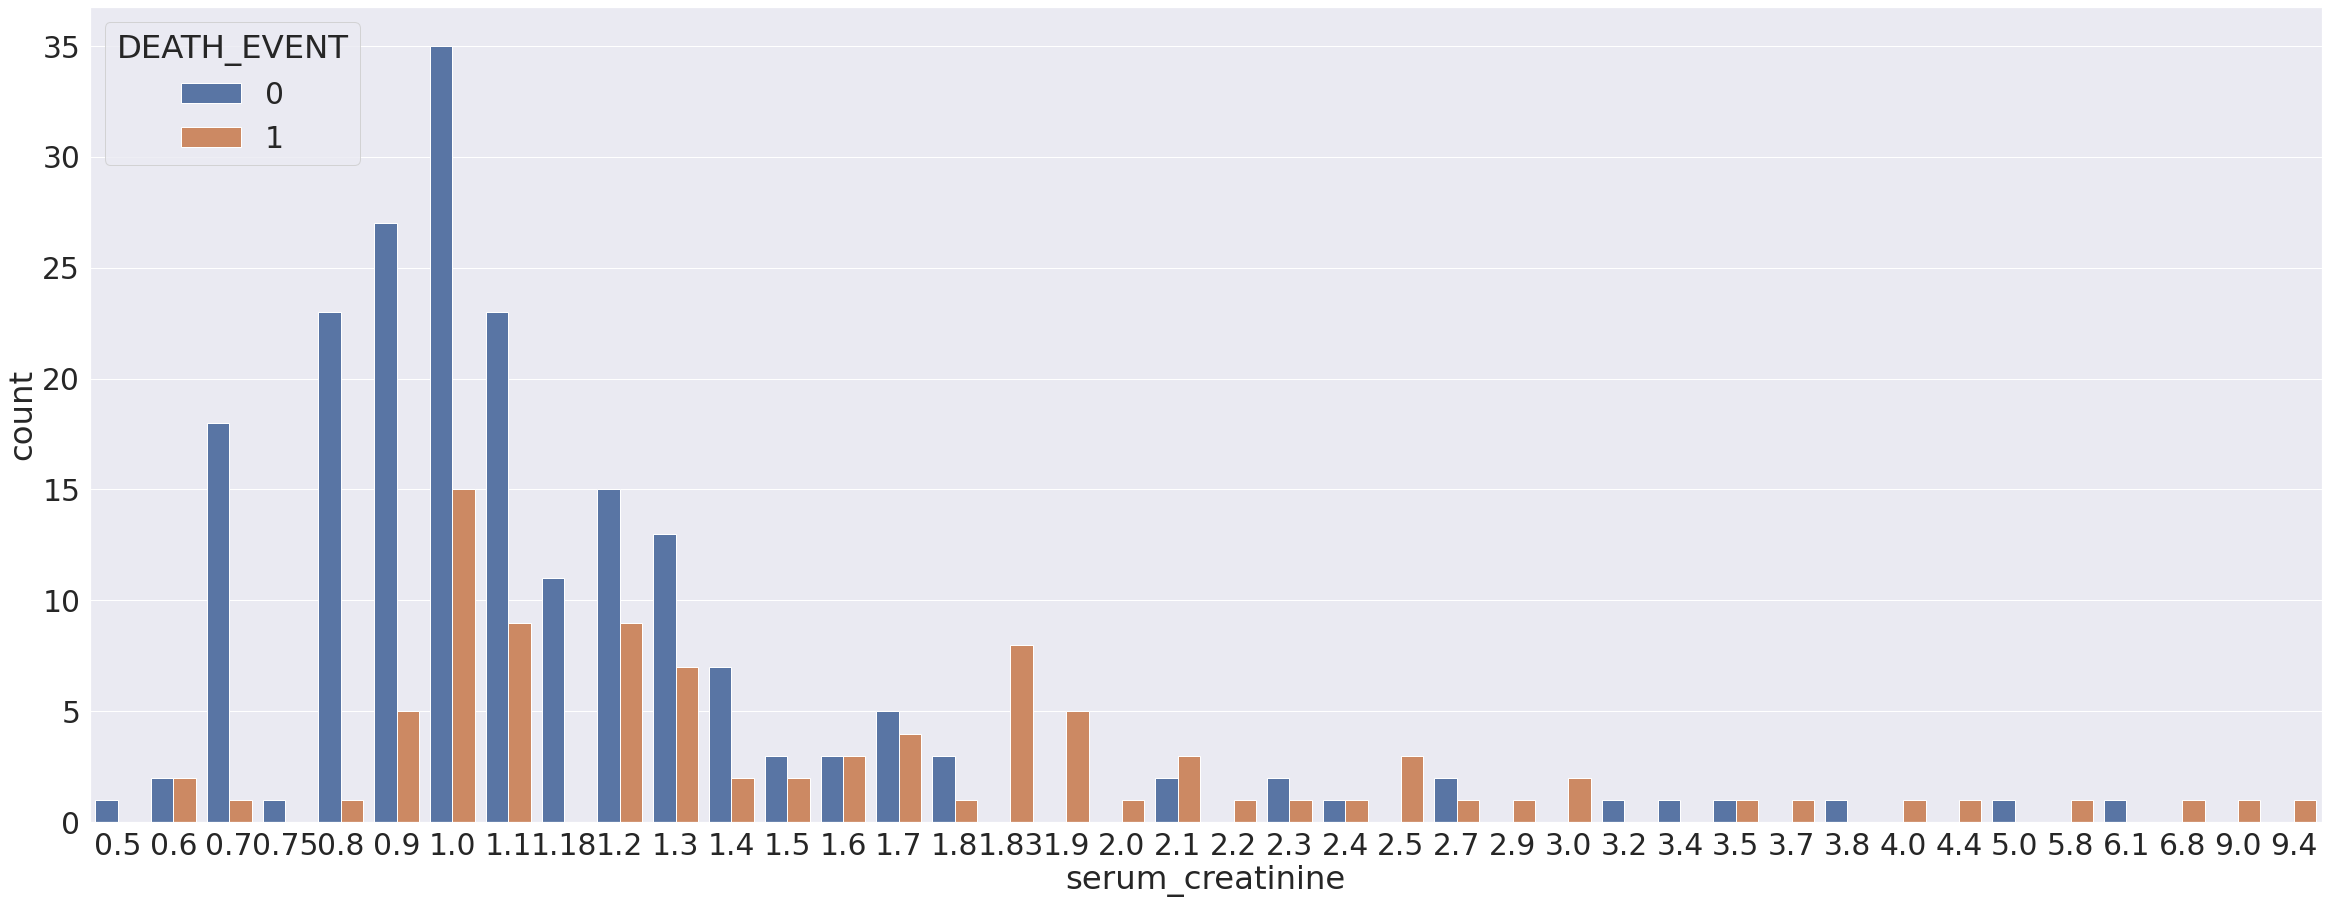

In [33]:
#seaborn related parameters

sns.set(rc={'figure.figsize':(40,15)})
sns.set(font_scale = 2.7)
sns.countplot(x = 'serum_creatinine', hue = 'DEATH_EVENT', data= df)
plt.show()

In [34]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


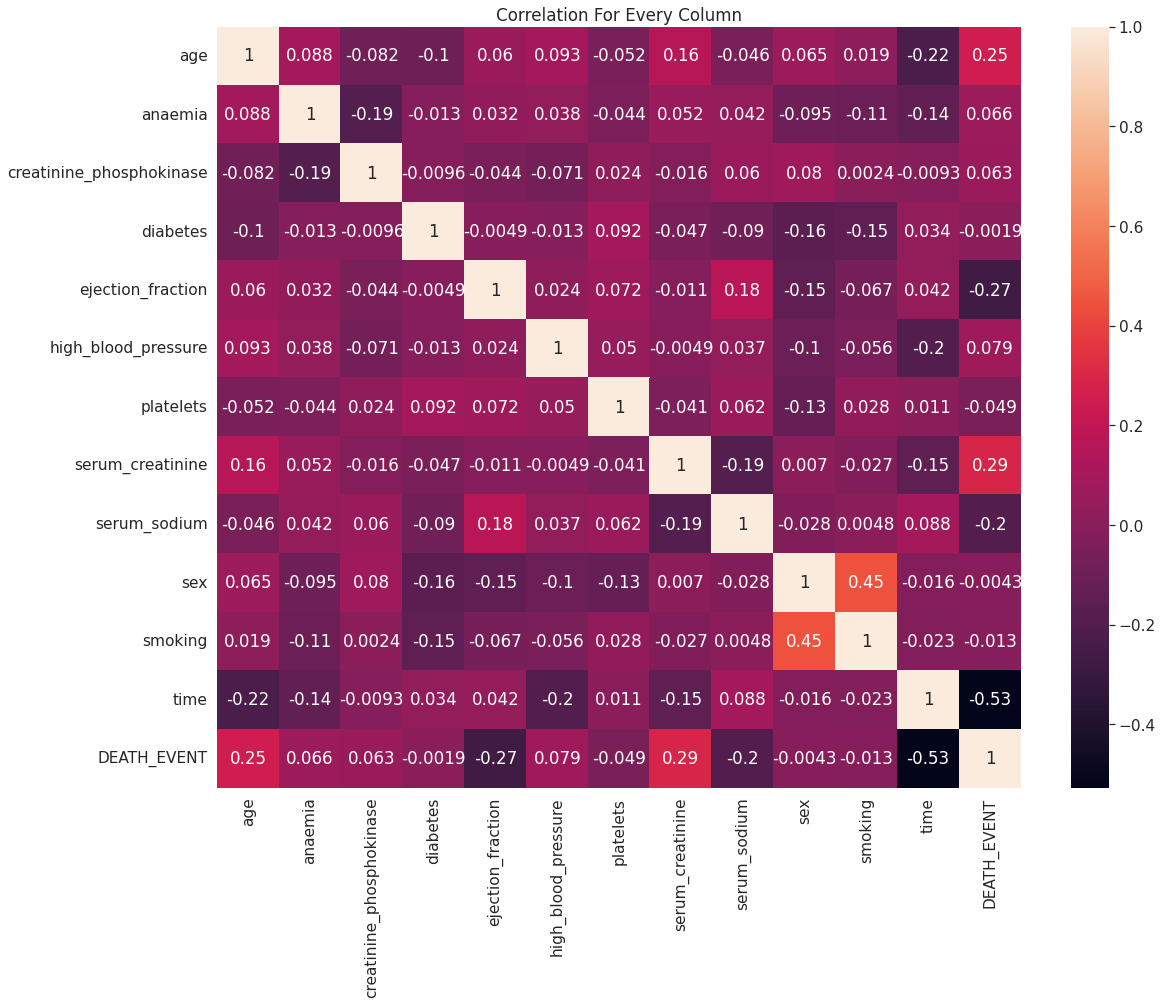

In [40]:
sns.set(font_scale = 1.4)
plt.figure(figsize=(18, 14))
plt.title("Correlation For Every Column")
sns.heatmap(df.corr(), annot = True) 
plt.show()

In [41]:
x = df.drop('DEATH_EVENT', axis =1)
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [42]:
y = df['DEATH_EVENT']
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [43]:
xtrain,xtest, ytrain, ytest  = tts(x,y, test_size = .25 , random_state =1)


In [44]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8
102,80.0,0,898,0,25,0,149000.0,1.1,144,1,1,87
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30
95,58.0,1,133,0,60,1,219000.0,1.0,141,1,0,83
67,72.0,1,110,0,25,0,274000.0,1.0,140,1,1,65


In [45]:
xtest.shape

(75, 12)

In [48]:
clf = DecisionTreeClassifier()

In [49]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

[Text(0.4109848484848485, 0.9545454545454546, 'time <= 73.5\ngini = 0.448\nsamples = 224\nvalue = [148, 76]'),
 Text(0.15151515151515152, 0.8636363636363636, 'serum_sodium <= 136.5\ngini = 0.274\nsamples = 61\nvalue = [10, 51]'),
 Text(0.06060606060606061, 0.7727272727272727, 'serum_creatinine <= 0.85\ngini = 0.111\nsamples = 34\nvalue = [2, 32]'),
 Text(0.030303030303030304, 0.6818181818181818, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09090909090909091, 0.6818181818181818, 'ejection_fraction <= 47.5\ngini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(0.06060606060606061, 0.5909090909090909, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.12121212121212122, 0.5909090909090909, 'anaemia <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15151515151515152, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.24242424242424243, 0.7727272727272727, 'serum_sodium <= 139.5\ngini = 0.4

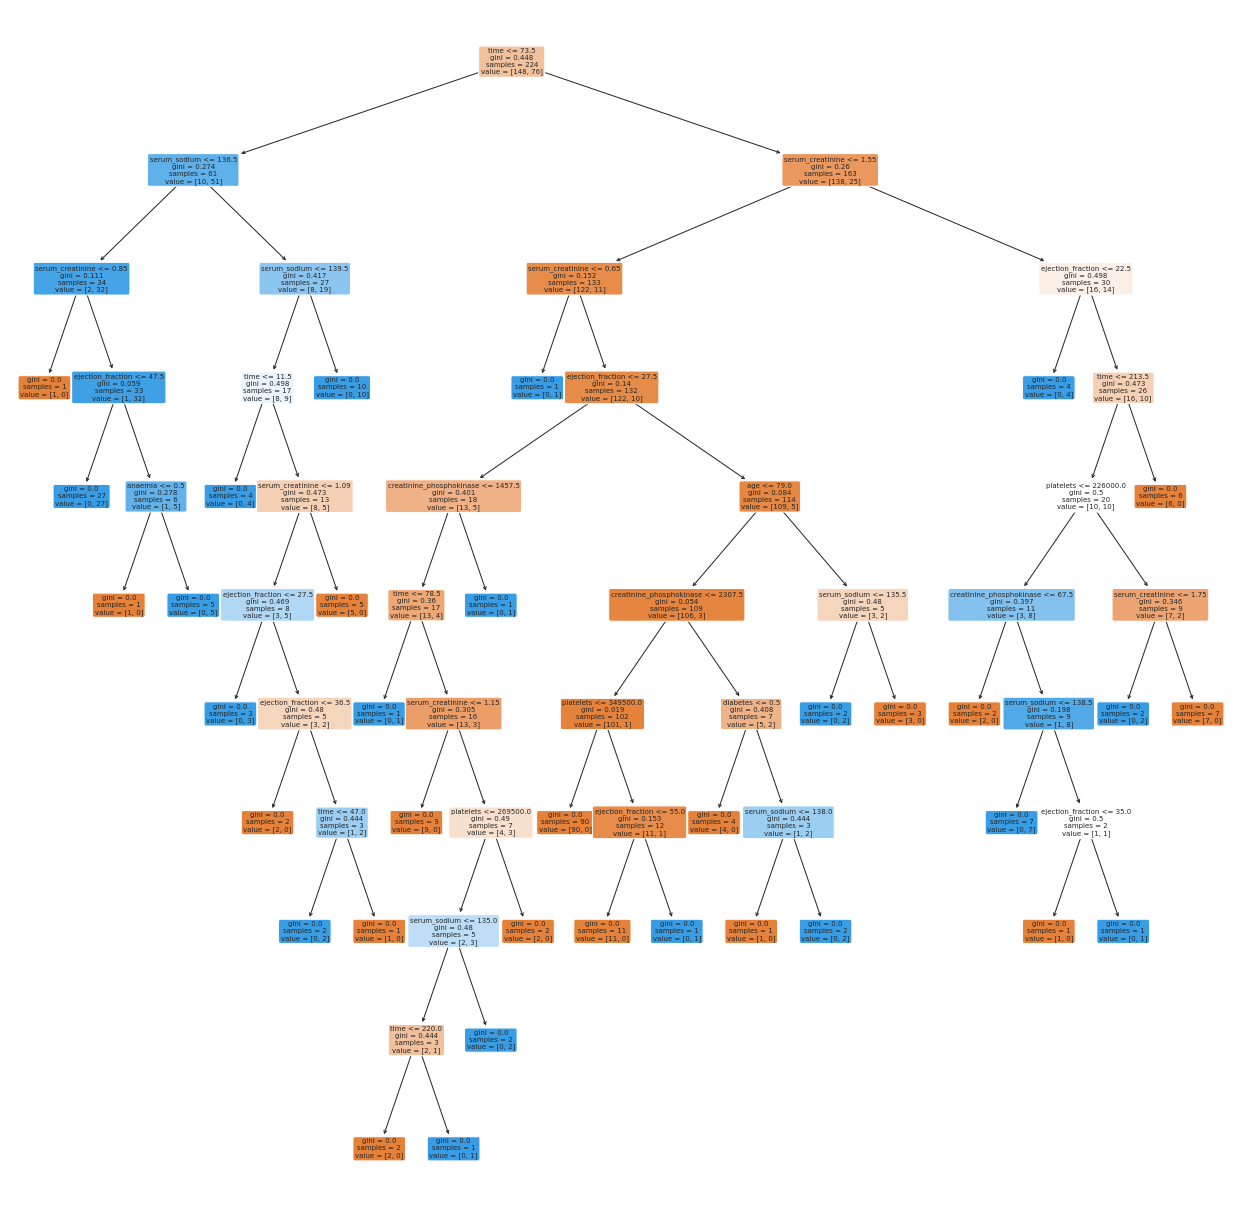

In [56]:
from sklearn import tree
plt.figure(figsize= (22,22))
tree.plot_tree(clf,filled = True , impurity= True, rounded= True, fontsize = 7, feature_names= x.columns)

In [57]:
pred = clf.predict(xtest)
pred #predicted result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0])

In [58]:
np.array(ytest ) #actual result

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0])

# Confusion Matrix

In [60]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        55
           1       0.60      0.60      0.60        20

    accuracy                           0.79        75
   macro avg       0.73      0.73      0.73        75
weighted avg       0.79      0.79      0.79        75



In [61]:
cm = confusion_matrix(ytest, pred)
cm

array([[47,  8],
       [ 8, 12]])

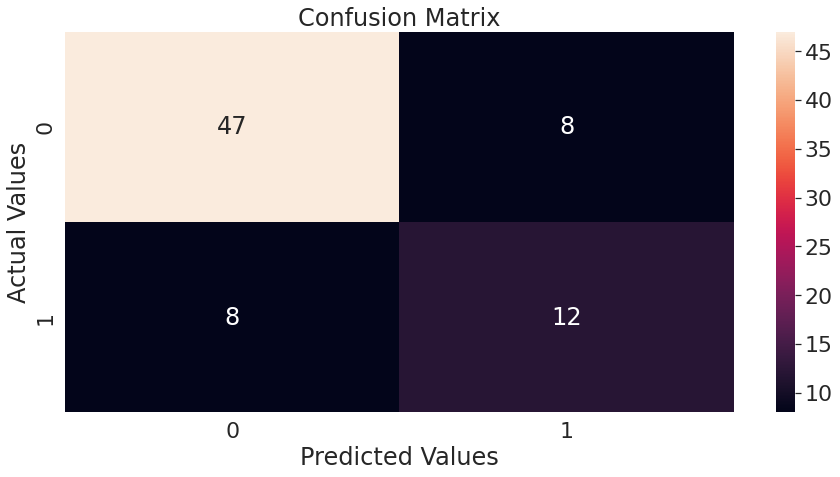

In [68]:
#heat map visualization of CF

sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 2)
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

In [71]:
tp,fn,fp,tn = confusion_matrix(ytest,pred).reshape(-1)  # reshape why?

In [72]:
tp

47

In [73]:
fn

8

In [74]:
fp

8

In [75]:
tn

12

In [77]:
accuracy_score(ytest,pred, normalize= True)

0.7866666666666666

In [79]:
# positive predictive value / precision

precision = tp/(tp+fp)
precision

0.8545454545454545

In [80]:
#True positive rate/ recall

recall = tp/(tp+fn)
recall

0.8545454545454545

In [84]:
#false positive rate / 1-specificity

specificity = fp/(fp+tn)
specificity

0.4

In [85]:
# F1 measure

F1 = (precision + recall)/2
F1

0.8545454545454545

In [87]:
# F1 score / harmonic mean

F1_score = (2*precision*recall)/(precision+recall)
F1_score


0.8545454545454545

In [88]:
# Threat Score / Critical success index

CSI = tp/ (tp+fn+fp)
CSI

0.746031746031746

In [90]:
# False discovery rate
fdr = fp/(tp+fp)
fdr

0.14545454545454545

# ROC curve & AUC

In [91]:
from sklearn.metrics import plot_roc_curve

<Figure size 1296x1152 with 0 Axes>

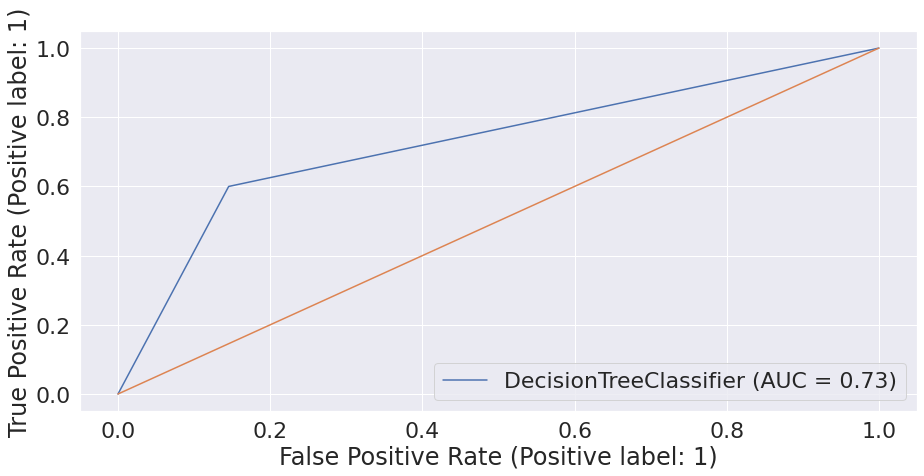

In [96]:
plt.figure(figsize=(18, 16))
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1]) # to draw the y= mx st. line
plt.show()



In [99]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(ytest, pred)
roc_auc

0.7272727272727272

PR AUC | Average Precision
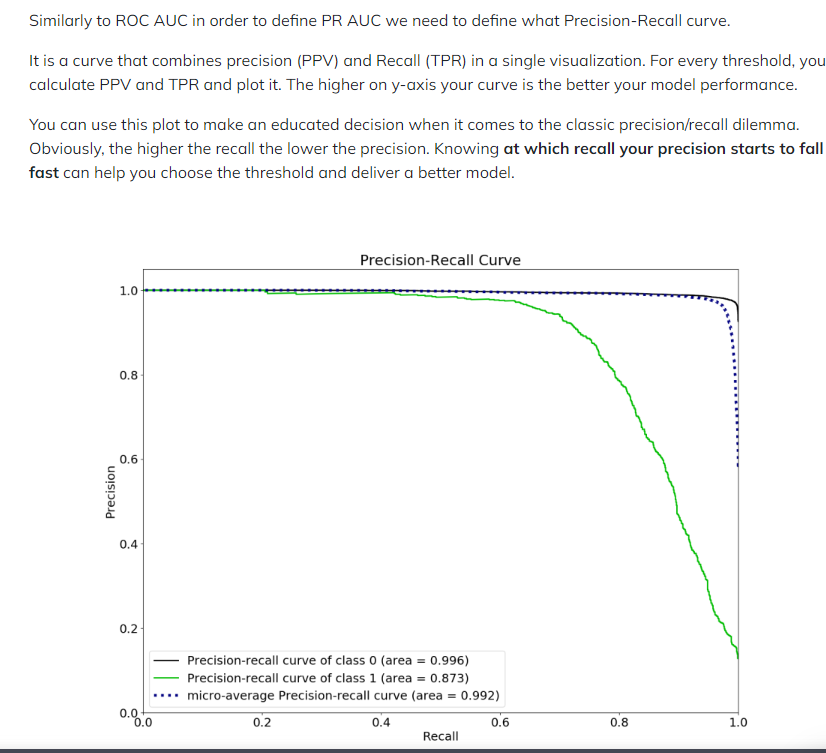

ValueError: ignored